In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Google_train_data.csv")
data1 = pd.read_csv("Google_test_data.csv")

In [3]:
data.head()
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [4]:
data.info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
length_data = len(data)
length_validation = len(data1) 

print("Train data length :", length_data)
print("Validation data lenth :", length_validation)

Train data length : 1258
Validation data lenth : 252


In [6]:
train_data = data[:length_data].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2012-01-03,325.25
1,2012-01-04,331.27
2,2012-01-05,329.83
3,2012-01-06,328.34
4,2012-01-09,322.04
...,...,...
1253,2016-12-23,790.90
1254,2016-12-27,790.68
1255,2016-12-28,793.70
1256,2016-12-29,783.33


In [7]:
validation_data = data1[:length_validation].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
0,2018-08-13,1236.979980
1,2018-08-14,1235.189941
2,2018-08-15,1229.260010
3,2018-08-16,1224.729980
4,2018-08-17,1202.030029
...,...,...
247,2019-08-07,1156.000000
248,2019-08-08,1182.829956
249,2019-08-09,1197.989990
250,2019-08-12,1179.209961


In [8]:
dataset_train = train_data.Open.values
dataset_train.shape

(1258,)

In [9]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1258, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1258, 1)

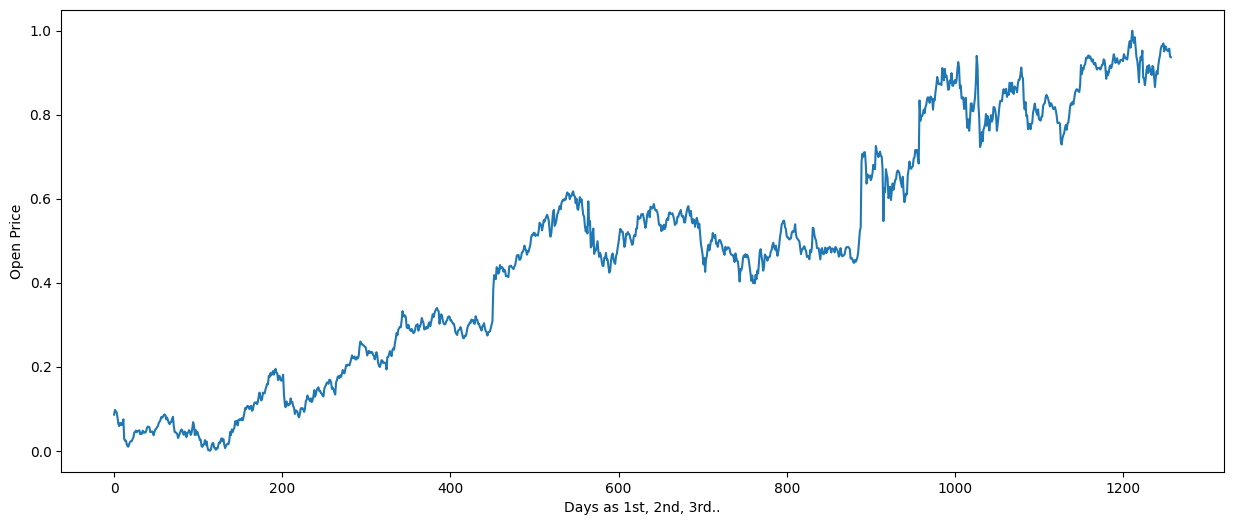

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [12]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_data):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1208, 50)
Shape of y_train before reshape : (1208,)


In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1208, 50, 1)
Shape of y_train after reshape : (1208, 1)


In [15]:
X_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [16]:
y_train[0]

array([0.05214302])

In [17]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(Dropout(0.2))


# adding second RNN layer and dropout regulatization

regressor.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(Dropout(0.2))

# adding third RNN layer and dropout regulatization

regressor.add(SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(Dropout(0.2))

# adding fourth RNN layer and dropout regulatization

regressor.add(SimpleRNN(units = 50))

regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

2022-12-28 10:24:07.389755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 10:24:11.971982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
38/38 [==============================] - 13s 68ms/step - loss: 0.3955 - accuracy: 0.0017
Epoch 2/50
38/38 [==============================] - 2s 65ms/step - loss: 0.2495 - accuracy: 8.2781e-04
Epoch 3/50
38/38 [==============================] - 2s 45ms/step - loss: 0.1589 - accuracy: 0.0017
Epoch 4/50
38/38 [==============================] - 2s 61ms/step - loss: 0.1307 - accuracy: 8.2781e-04
Epoch 5/50
38/38 [==============================] - 3s 68ms/step - loss: 0.0997 - accuracy: 0.0017
Epoch 6/50
38/38 [==============================] - 2s 43ms/step - loss: 0.0919 - accuracy: 0.0017
Epoch 7/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0687 - accuracy: 0.0017
Epoch 8/50
38/38 [==============================] - 2s 60ms/step - loss: 0.0605 - accuracy: 0.0017
Epoch 9/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0522 - accuracy: 8.2781e-04
Epoch 10/50
38/38 [==============================] - 2s 43ms/step - loss: 0.0434 - accuracy: 0.0

In [18]:
# Losses
history.history["loss"]

[0.39549124240875244,
 0.24946655333042145,
 0.15890677273273468,
 0.13074363768100739,
 0.09968249499797821,
 0.09192530810832977,
 0.06870835274457932,
 0.06046561151742935,
 0.052204523235559464,
 0.043442435562610626,
 0.03860684856772423,
 0.03504966199398041,
 0.028851496055722237,
 0.027328848838806152,
 0.02695009671151638,
 0.02199363522231579,
 0.021471627056598663,
 0.019505580887198448,
 0.018096202984452248,
 0.01655600592494011,
 0.016495903953909874,
 0.01506292074918747,
 0.013506537303328514,
 0.011782102286815643,
 0.012341232039034367,
 0.011920013464987278,
 0.010692018084228039,
 0.011346937157213688,
 0.010765963234007359,
 0.009778196923434734,
 0.008393014781177044,
 0.008318536914885044,
 0.008372983895242214,
 0.008724313229322433,
 0.007726509124040604,
 0.007398767396807671,
 0.006717596668750048,
 0.006755379494279623,
 0.007076413370668888,
 0.00646156957373023,
 0.005698090419173241,
 0.005846756044775248,
 0.005886833183467388,
 0.006070695351809263,
 0.

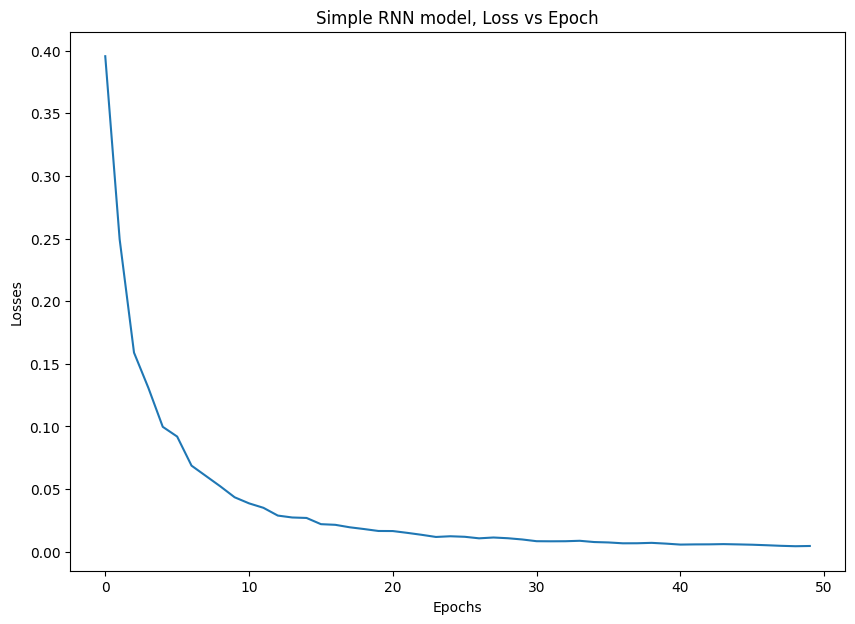

In [19]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

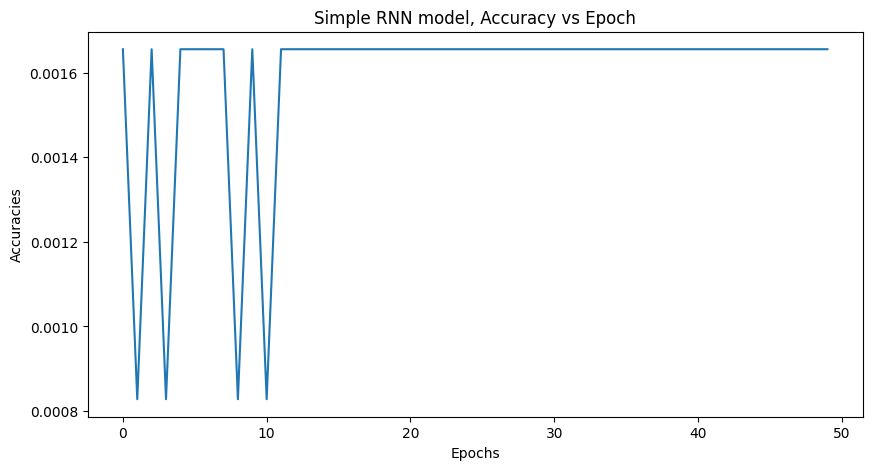

In [20]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [21]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

38/38 [==============================] - 2s 18ms/step


(1208, 1)

In [22]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1208, 1)

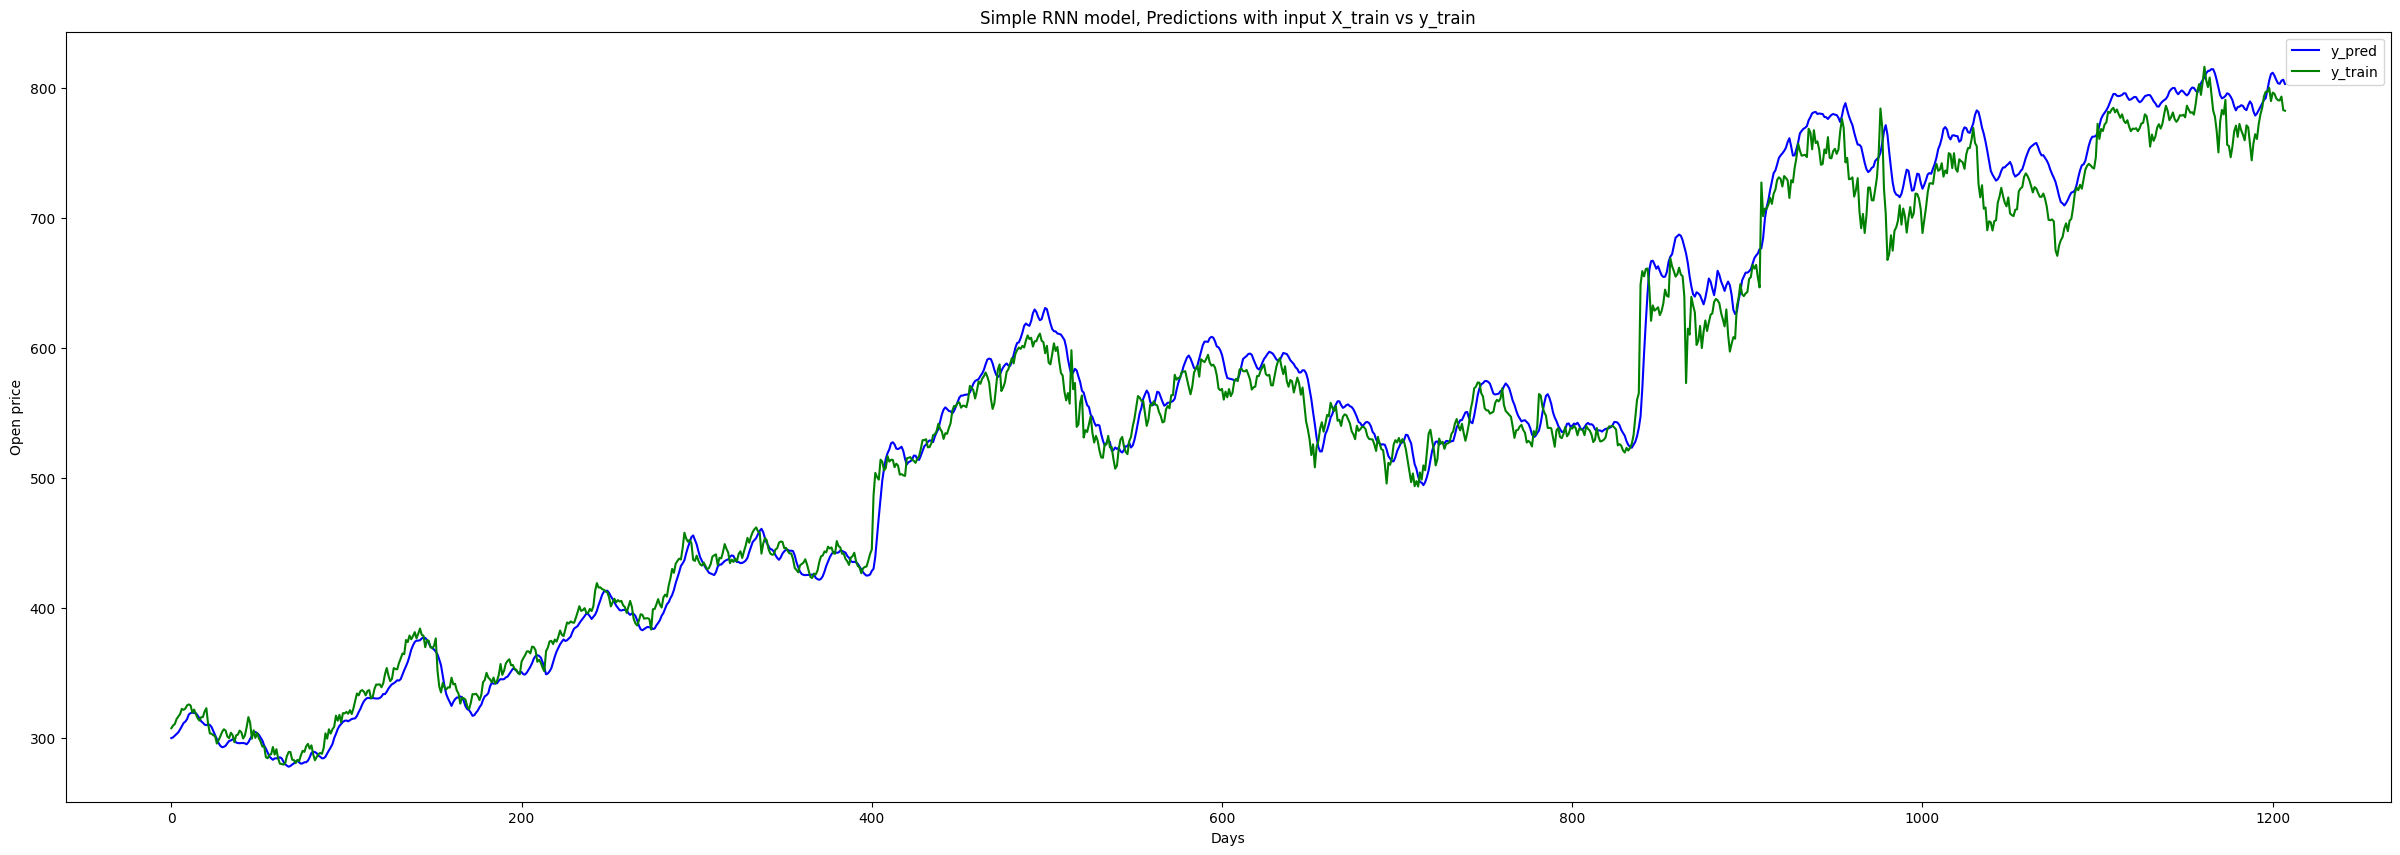

In [23]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [24]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (252, 1)


In [25]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [26]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [27]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (202, 50)
Shape of y_test before reshape : (202,)


In [28]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [29]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (202, 50, 1)
Shape of y_test after reshape : (202, 1)


In [30]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

7/7 [==============================] - 0s 18ms/step
Shape of y_pred_of_test : (202, 1)


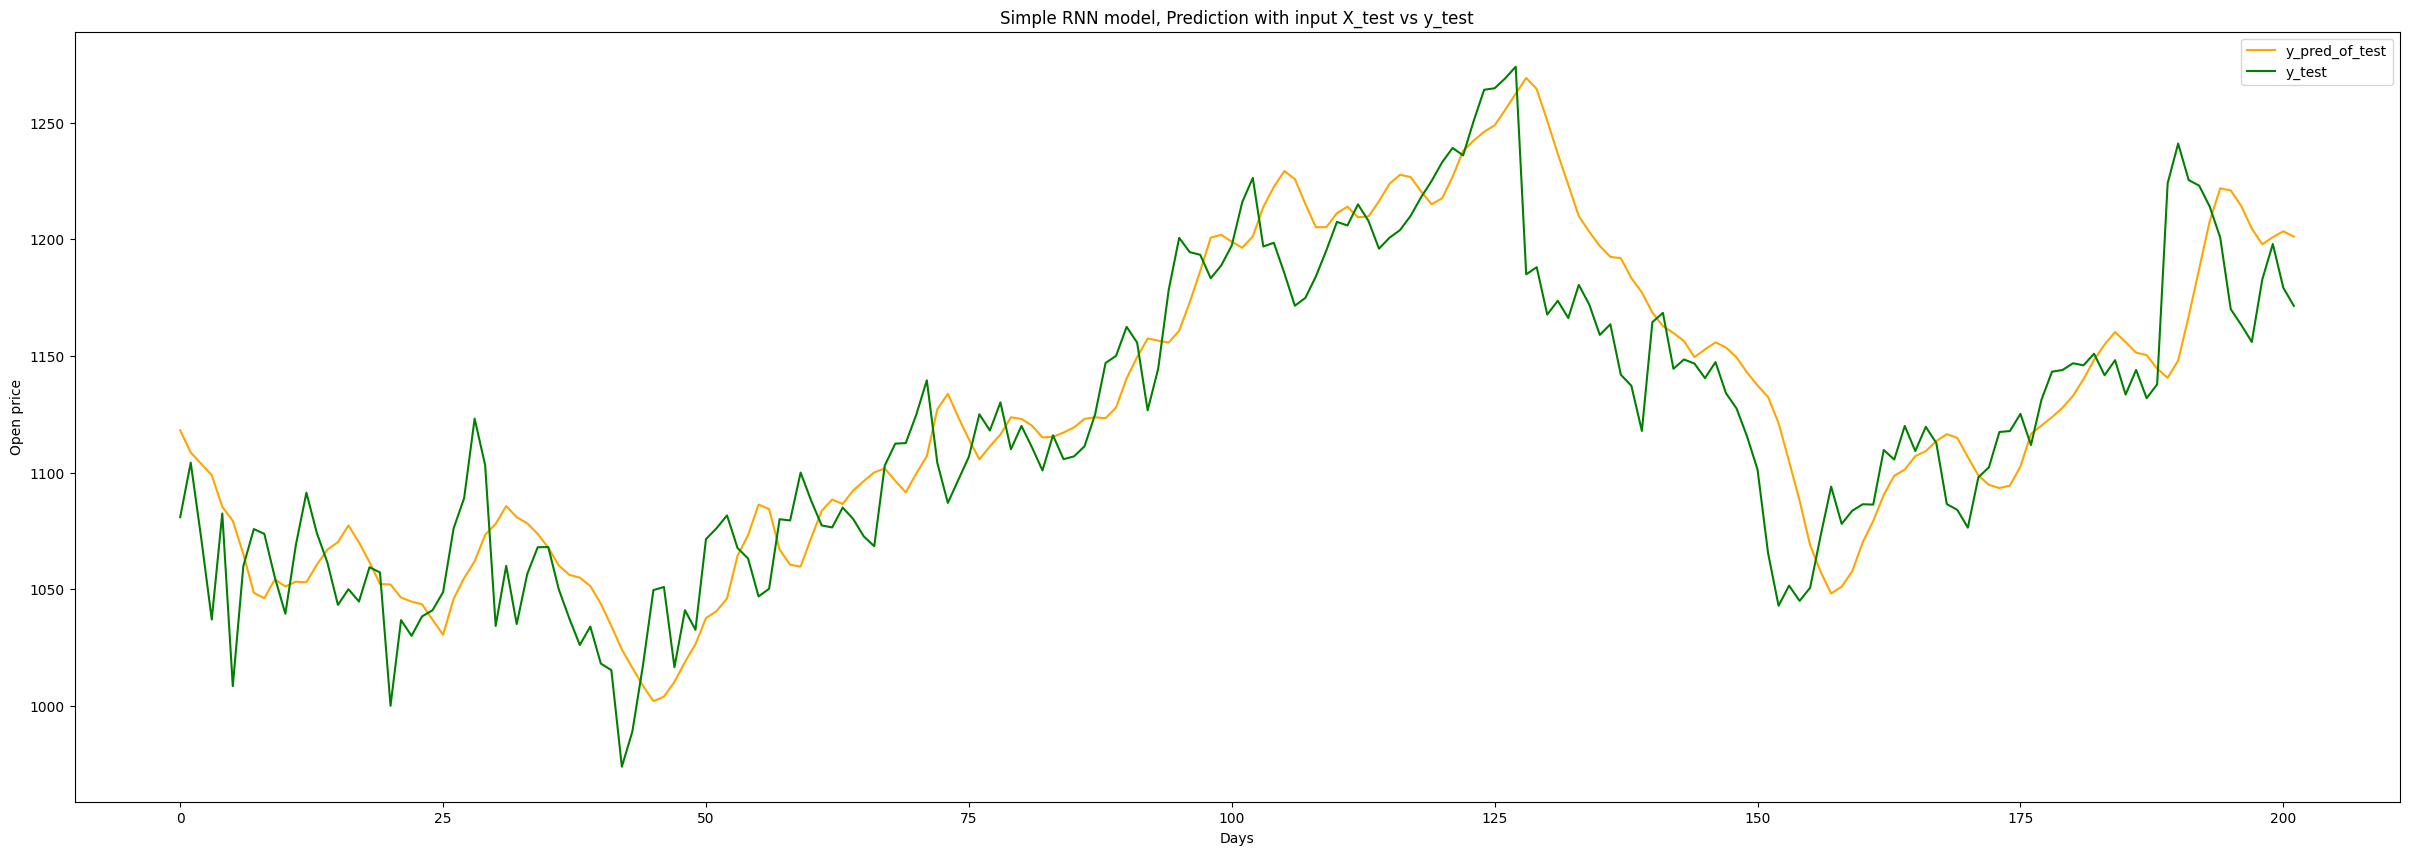

In [31]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

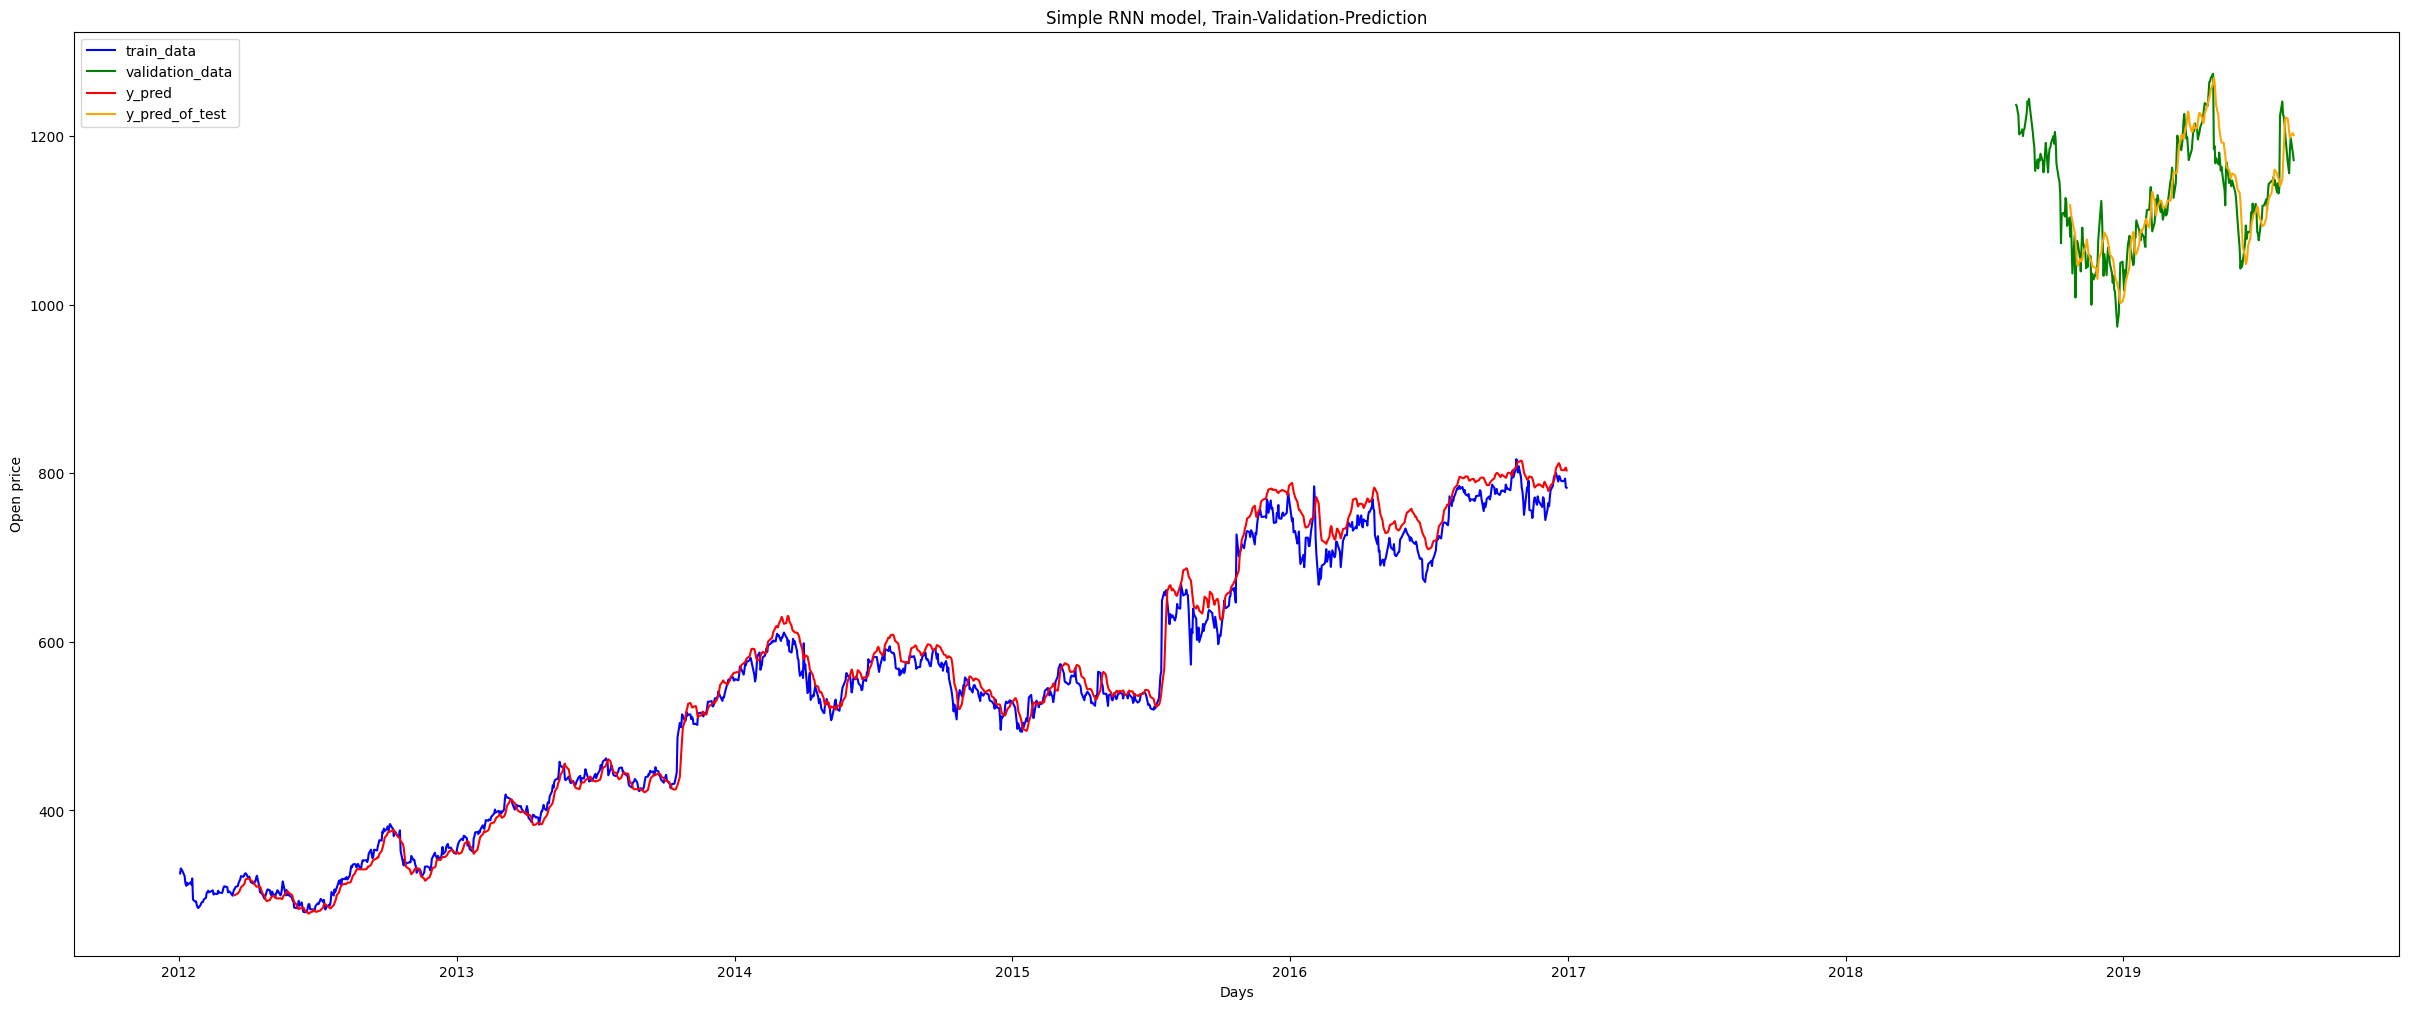

In [32]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [33]:
y_train = scaler.fit_transform(y_train)

In [34]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
121/121 [==============================] - 12s 47ms/step - loss: 0.0088 - accuracy: 0.0017
Epoch 2/10
121/121 [==============================] - 6s 48ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 3/10
121/121 [==============================] - 7s 59ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 4/10
121/121 [==============================] - 8s 67ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 5/10
121/121 [==============================] - 6s 46ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 6/10
121/121 [==============================] - 5s 40ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 7/10
121/121 [==============================] - 6s 52ms/step - loss: 9.5399e-04 - accuracy: 0.0017
Epoch 8/10
121/121 [==============================] - 5s 43ms/step - loss: 7.9407e-04 - accuracy: 0.0017
Epoch 9/10
121/121 [==============================] - 5s 45ms/step - loss: 8.8811e-04 - accuracy: 0.0017
Epoch 10/10
121/121 [==============================] - 6s 48ms/step - loss: 7.

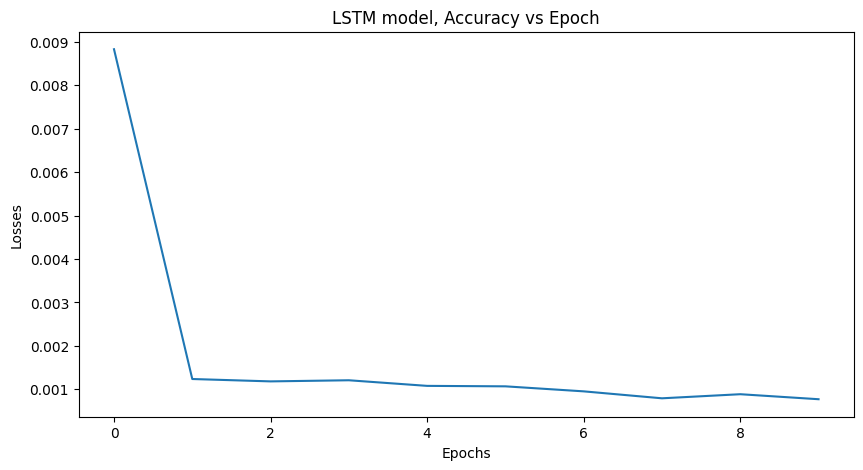

In [35]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

7/7 [==============================] - 1s 16ms/step


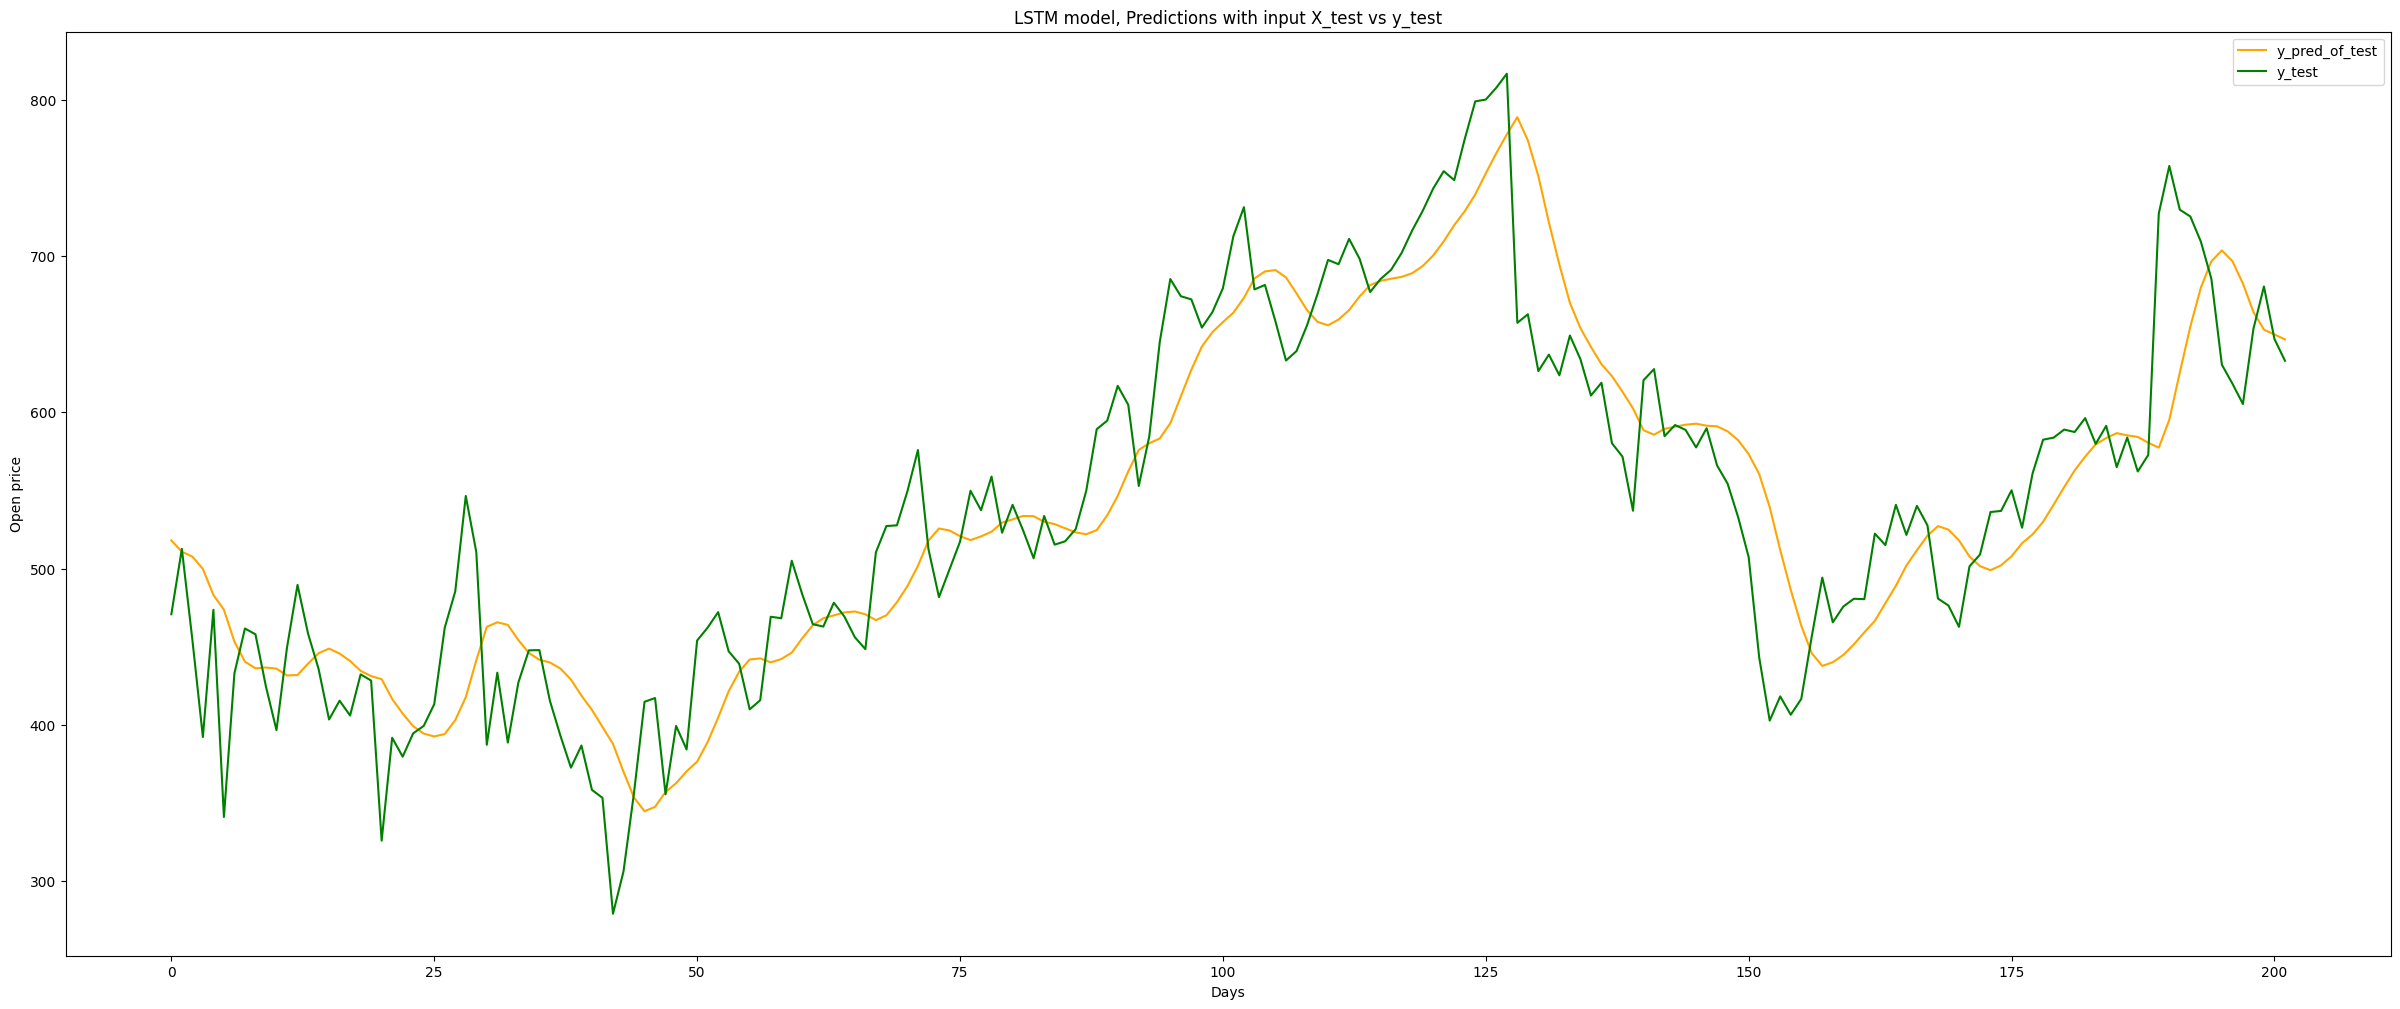

In [36]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()